In [3]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [4]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6']
df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Incomplete Datasets\Incomplete Datasets Without Labels\Bupa\Bupa_AW_1.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6
0,85,92,45,27.0,31.0,0.0
1,85,64,59,32.0,23.0,0.0
2,86,54,33,16.0,54.0,0.0
3,91,78,34,24.0,36.0,0.0
4,98,55,13,NaN,17.0,0.0
...,...,...,...,...,...,...
340,91,54,25,22.0,35.0,4.0
341,89,48,32,22.0,14.0,4.0
342,85,52,22,23.0,34.0,4.0
343,95,93,21,27.0,47.0,6.0


In [5]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
int64		column 1	0
int64		column 2	0
int64		column 3	0
float64		column 4	12
float64		column 5	6
float64		column 6	0


In [6]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6
count,345.000000,345.000000,345.000000,333.000000,339.000000,345.000000
mean,90.159420,69.869565,30.405797,24.666667,38.427729,3.455072
std,4.448096,18.347670,19.512309,9.956230,39.318566,3.337835
min,65.000000,23.000000,4.000000,5.000000,5.000000,0.000000
25%,87.000000,57.000000,19.000000,19.000000,15.000000,0.500000
50%,90.000000,67.000000,26.000000,23.000000,25.000000,3.000000
75%,93.000000,80.000000,34.000000,27.000000,46.500000,6.000000
max,103.000000,138.000000,155.000000,82.000000,297.000000,20.000000


<AxesSubplot:>

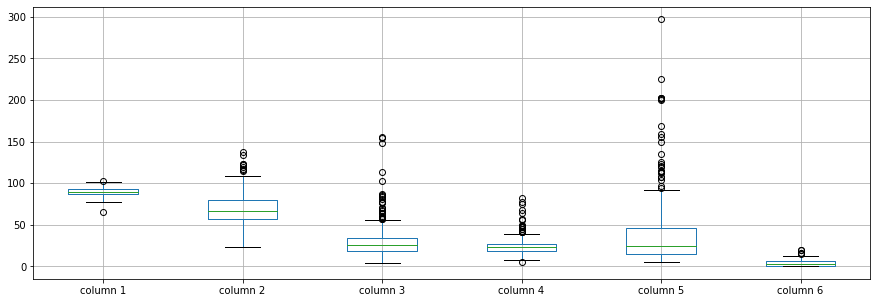

In [7]:
df.boxplot(return_type='axes', figsize=(15,5))

In [8]:
df.mean()

column 1    90.159420
column 2    69.869565
column 3    30.405797
column 4    24.666667
column 5    38.427729
column 6     3.455072
dtype: float64

In [9]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6
column 1,1.000000,0.044103,0.147695,0.196080,0.222200,0.312680
column 2,0.044103,1.000000,0.076208,0.137438,0.131931,0.100796
column 3,0.147695,0.076208,1.000000,0.754561,0.499112,0.206848
column 4,0.196080,0.137438,0.754561,1.000000,0.529000,0.269429
column 5,0.222200,0.131931,0.499112,0.529000,1.000000,0.337157
column 6,0.312680,0.100796,0.206848,0.269429,0.337157,1.000000


In [10]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [11]:
imputer = md.Midas(layer_structure = [6,6+8,6+8+8,6+8+8+8,6+8+8+8+8,6+8+8+8,6+8+8,6+8,6], vae_layer = False, seed = 80)
imputer.build_model(df)
imputer.train_model(training_epochs=8)


Size index: [6]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 280.3217962355841
Epoch: 1 , loss: 279.3185780843099
Epoch: 2 , loss: 277.8683268229167
Epoch: 3 , loss: 279.8212599981399
Epoch: 4 , loss: 278.3860153924851
Epoch: 5 , loss: 278.1290770031157
Epoch: 6 , loss: 280.4355991908482
Epoch: 7 , loss: 280.04531642368863
Training complete. Saving file...
Model saved in file: tmp/MIDAS


In [12]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(345, 6)

In [13]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1    90.0
column 2    47.0
column 3    28.0
column 4    15.0
column 5    18.0
column 6     0.5
Name: 21, dtype: float64

In [14]:
complete_df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Original Datasets (1)\Original Datasets Without Labels\Bupa.xlsx', header=None,names=column_names)

In [15]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6
0,0,0,0,0.000000,0.0,0.0
1,0,0,0,0.000000,0.0,0.0
2,0,0,0,0.000000,0.0,0.0
3,0,0,0,0.000000,0.0,0.0
4,0,0,0,-16.998785,0.0,0.0
...,...,...,...,...,...,...
340,0,0,0,0.000000,0.0,0.0
341,0,0,0,0.000000,0.0,0.0
342,0,0,0,0.000000,0.0,0.0
343,0,0,0,0.000000,0.0,0.0


Calculating NRMSE Value

In [16]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [17]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [18]:
numerator=Frobenius_norm(new_df-complete_df)
numerator

146.38819965698949

In [19]:
denominator=Frobenius_norm(complete_df)
denominator

2519.762091944396

In [23]:
NRMS=numerator/denominator
NRMS


0.058096040147991815

In [24]:
new_df.iloc[66,:]

column 1    86.0
column 2    54.0
column 3    20.0
column 4    21.0
column 5    16.0
column 6     2.0
Name: 66, dtype: float64

In [25]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6
0,85,92,45,27.000000,31.0,0.0
1,85,64,59,32.000000,23.0,0.0
2,86,54,33,16.000000,54.0,0.0
3,91,78,34,24.000000,36.0,0.0
4,98,55,13,0.001215,17.0,0.0
...,...,...,...,...,...,...
340,91,54,25,22.000000,35.0,4.0
341,89,48,32,22.000000,14.0,4.0
342,85,52,22,23.000000,34.0,4.0
343,95,93,21,27.000000,47.0,6.0


In [26]:
imputations[-1].to_excel("Bupa_AW_1(imp).xlsx", index=False, header=False)